**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [2]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

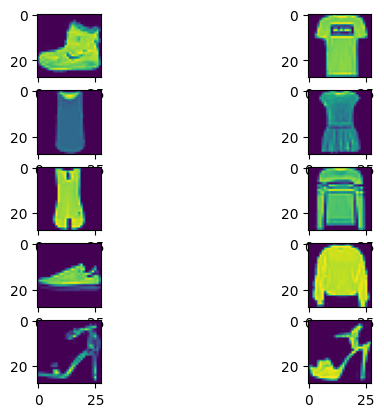

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(x_train[i])

# Build CNN Model

In [4]:
x_train /= 255
x_test /=255
model = None  #Initialize model here

'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 5 epochs

'''
batch_size=64
epochs=5
num_classes=10

def build_model(optimizer): 

  '''
  Define a sequential model with categorical cross entropy as loss function consisting
  2 convolution and 2 pooling layers with relu as activation function followed by
  droput -> flatten -> dense -> dropout -> dense

  Convolution layer - (kernel size = (3*3))
  Pooling layer - (pool size = (2*2))

  '''
  model=Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  model.summary

  #****** INSERT MODEL CODE HERE ******

  return model 

#**** call build model with RMSprop and SGDOptimizer Optimizer ****
model=build_model('rmsprop')

# plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test)) 

e:\ML\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7257 - loss: 0.7604 - val_accuracy: 0.8377 - val_loss: 0.4244
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8611 - loss: 0.3857 - val_accuracy: 0.8803 - val_loss: 0.3271
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8816 - loss: 0.3269 - val_accuracy: 0.8875 - val_loss: 0.3185
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8889 - loss: 0.3044 - val_accuracy: 0.8937 - val_loss: 0.3026
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8967 - loss: 0.2842 - val_accuracy: 0.9019 - val_loss: 0.2739


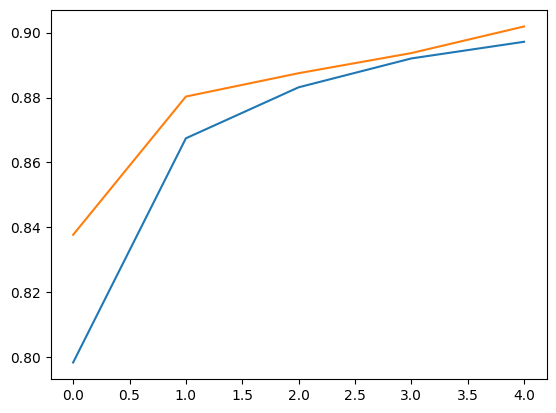

In [5]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Shirt


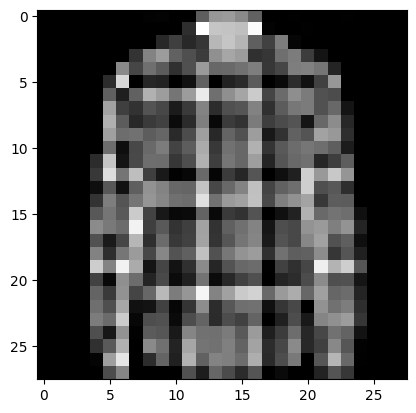

In [7]:
keras.models.save_model(model, "fashionmnist.h5", save_format="h5")

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):

  '''
  Reshape the image into (1,28,28)
  predict the answer and print it

  '''
  #**** Insert code here ****
  img=np.reshape(img,(1,28,28))
  pred=model.predict(img)
  ans=np.argmax(pred)
  print(labels[ans])
  


m = load_model('fashionmnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
